i found out using gpu beda kalau charged or not

In [20]:
from transformers import AutoModelForCausalLM
from PIL import Image
import torch

import os, time

In [ ]:
print("GPU available:", torch.cuda.is_available())
print("Device:", torch.device("cuda" if torch.cuda.is_available() else "cpu"))

In [8]:
IMG_PATH = "data/LLMtest.jpg"
TEST_PATH = "moondreamtest"

In [5]:
# import model
model = AutoModelForCausalLM.from_pretrained(
    "vikhyatk/moondream2",
    trust_remote_code=True,
    dtype=torch.bfloat16,
    device_map="cuda",
)

# load image
image = Image.open(IMG_PATH)

# Generate a short caption
short_result = model.caption(
    image, 
    length="short", 
)

print(short_result)

{'caption': 'A person in a green sweater, black pants, and white sneakers stands on sidewalk, facing left, with a metal railing and green plants in the background.'}


## Test on a few Photos

In [6]:
!cp -r "/mnt/c/Users/farrf/Downloads/moondreamtest" /home/farrfoxr/datasci/projects/moondream

In [14]:
moondreamtest_PIL_images = []

for per_images_path in os.listdir(TEST_PATH):
    image = Image.open(f'{TEST_PATH}/{per_images_path}')
    moondreamtest_PIL_images.append(image)
    print(f'Added: {TEST_PATH}/{per_images_path}')

Added: moondreamtest/fakerab.jpeg
Added: moondreamtest/veniceraw.jpg
Added: moondreamtest/picnic.jpeg
Added: moondreamtest/beachflow.jpeg
Added: moondreamtest/selfstreet.jpg
Added: moondreamtest/realrab.png
Added: moondreamtest/venlight.png


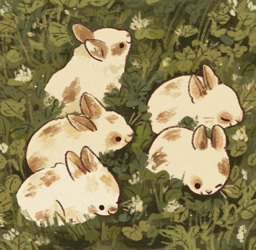

Caption 1: {'caption': 'Five white bunnies with brown spots huddle together in a verdant field, surrounded by lush greenery and white flowers.'}
time taken: 1.0179367065429688


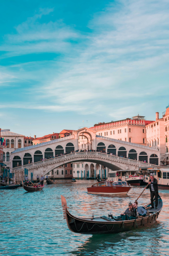

Caption 2: {'caption': 'The Rialto Bridge in Venice, Italy, features 14 arches and is painted white, contrasting with the blue sky and pink buildings, while a gondola traverses the Grand Canal in the foreground.'}
time taken: 1.1713311672210693


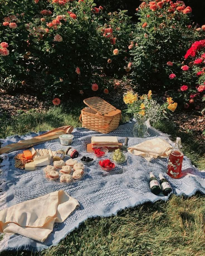

Caption 3: {'caption': 'A blue picnic blanket with white checkered pattern hosts a floral arrangement, cheese and crackers, grapes, a red drink, and wine bottles in a lush garden with pink and red flowers.'}
time taken: 1.1628029346466064


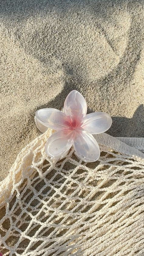

Caption 4: {'caption': 'A white flower with pink center lies on a sandy beach, accompanied by a folded white netted bag.'}
time taken: 0.6413815021514893


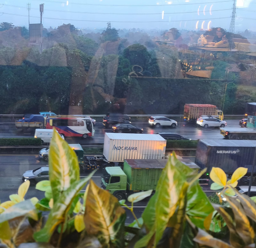

Caption 5: {'caption': 'A bustling city street, framed by a lush tapestry of plants, is illuminated by the soft glow of streetlights and framed by a building with large windows.'}
time taken: 0.961421012878418


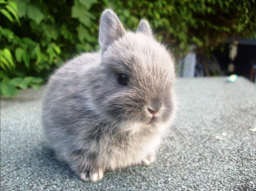

Caption 6: {'caption': 'A gray rabbit with black stripes sits on a concrete surface, facing the camera with a curious expression and surrounded by green foliage.'}
time taken: 0.8007638454437256


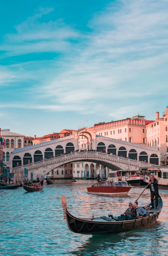

Caption 7: {'caption': 'The Rialto Bridge in Venice, Italy, features 14 arches and is painted in white and red hues, spanning the Grand Canal with gondolas in the foreground.'}
time taken: 0.9748525619506836


In [26]:
for i, image in enumerate(moondreamtest_PIL_images):
    start = time.time()

    image.thumbnail((256, 256))
    image.show()
    print(f"Caption {i+1}: {model.caption(image, length='short')}")

    end = time.time()
    elapsed = end - start
    print(f'time taken: {elapsed}')

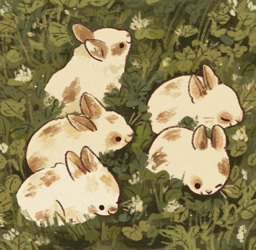

Caption 1: {'caption': 'Five white bunnies with brown spots huddle together in a verdant field, surrounded by lush greenery and white flowers.'}
resize: 0.0092s | caption: 1.1063s | total: 1.1155s


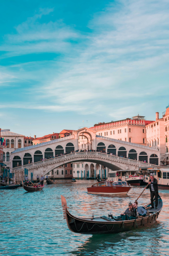

Caption 2: {'caption': 'The Rialto Bridge in Venice, Italy, features 14 arches and is painted white, contrasting with the blue sky and pink buildings, while a gondola traverses the Grand Canal in the foreground.'}
resize: 0.0085s | caption: 1.2044s | total: 1.2129s


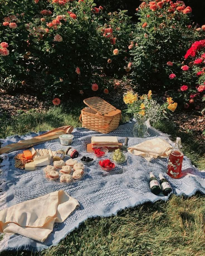

Caption 3: {'caption': 'A blue picnic blanket with white checkered pattern hosts a floral arrangement, cheese and crackers, grapes, a red drink, and wine bottles in a lush garden with pink and red flowers.'}
resize: 0.0071s | caption: 1.2933s | total: 1.3005s


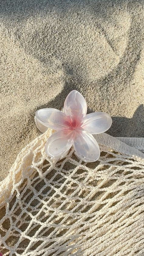

Caption 4: {'caption': 'A white flower with pink center lies on a sandy beach, accompanied by a folded white netted bag.'}
resize: 0.0056s | caption: 0.7407s | total: 0.7463s


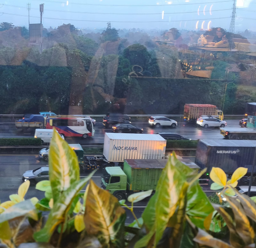

Caption 5: {'caption': 'A bustling city street, framed by a lush tapestry of plants, is illuminated by the soft glow of streetlights and framed by a building with large windows.'}
resize: 0.0080s | caption: 1.0474s | total: 1.0555s


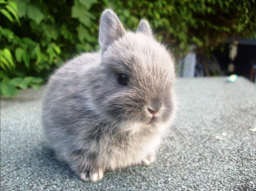

Caption 6: {'caption': 'A gray rabbit with black stripes sits on a concrete surface, facing the camera with a curious expression and surrounded by green foliage.'}
resize: 0.0085s | caption: 1.0284s | total: 1.0368s


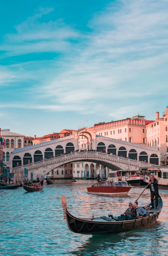

Caption 7: {'caption': 'The Rialto Bridge in Venice, Italy, features 14 arches and is painted in white and red hues, spanning the Grand Canal with gondolas, boats, and pink and white buildings in the background.'}
resize: 0.0070s | caption: 1.3026s | total: 1.3096s


In [27]:
import time

for i, image in enumerate(moondreamtest_PIL_images):
    t0 = time.perf_counter()
    image.thumbnail((256, 256))
    image.show()
    t1 = time.perf_counter()
    caption = model.caption(image, length='short')
    t2 = time.perf_counter()

    print(f"Caption {i+1}: {caption}")
    print(f"resize: {t1 - t0:.4f}s | caption: {t2 - t1:.4f}s | total: {t2 - t0:.4f}s")